In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount('/content/drive', force_remount = True)
data = pd.read_csv('/content/drive/MyDrive/Fundamental/train.csv')
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [ ]:
#memilih fitur (features) dan target
features = ['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt']
x = data[features]
y = data['SalePrice']

In [ ]:
#standarisasi fitur[lihat materi minggu ke-1]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)
print('Shape of x_train:', x_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

Shape of x_train: (1168, 7)
shape of x_test: (292, 7)
shape of y_train: (1168,)
shape of y_test: (292,)


In [ ]:
#inisialisasi model k-Mean dengan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)
# Latih model menggunakan data
kmeans.fit(x_scaled)
#dapatkan label cluster
labels = kmeans.labels_



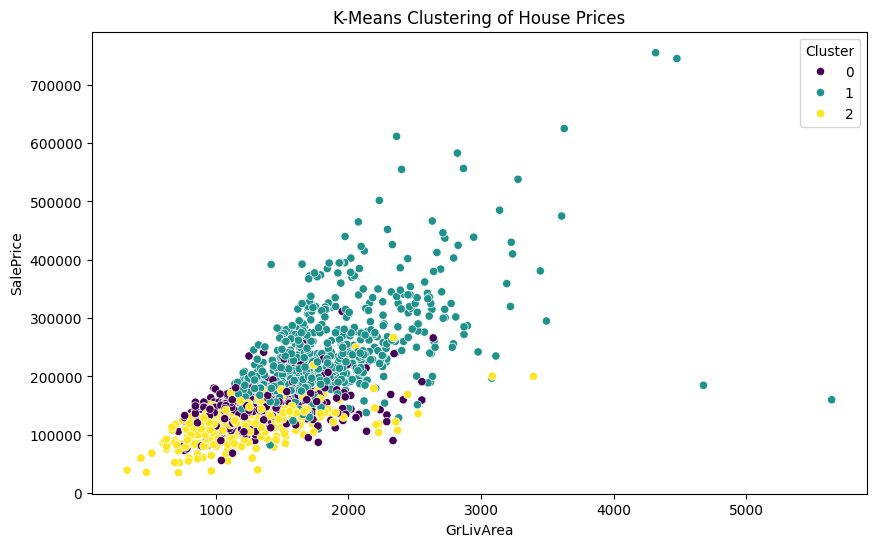

In [ ]:
#Tambah label cluster ke data asli
data['Cluster'] = labels
#Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x='GrLivArea', y='SalePrice', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of House Prices')
plt.show()

In [ ]:
#Caculate evaluation matrics
sil_score = silhouette_score(x_scaled, labels)
db_index = davies_bouldin_score(x_scaled, labels)
ch_index = calinski_harabasz_score(x_scaled, labels)
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)
#print evaluation matrics
print('silhouette Score:', sil_score)
print('Davies-Bouldin Index:', db_index)
print('Calinski_Harabasz Index:', ch_index)
print('Adjusted Rand Index:', ari)
print('Normalized Mutual Informaion:', nmi)

silhouette Score: 0.26525371019478705
Davies-Bouldin Index: 1.4472384245093164
Calinski_Harabasz Index: 674.6522184471318
Adjusted Rand Index: 0.0027789357904749843
Normalized Mutual Informaion: 0.2013225052945592
